In [54]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [55]:
df_data = pd.read_csv('../data/merged_df_cleaned.csv')

In [56]:
df_data.head()

,order_id,driver_lat,driver_lng,origin_lat,origin_lng,distance_diff,trip_start_time,duration_min,holiday,action_count,driver_action,Day of Week,Hour of Day,fulfilled
0,392001,6.602207,3.270465,6.601042,3.276634,0.694264,2021-07-01 09:30:59,3.616667,False,1,accepted,Thursday,9,False
1,392005,6.549147,3.392184,6.565088,3.384441,1.959786,2021-07-01 10:53:36,34.250000,False,1,accepted,Thursday,10,True
2,392009,6.644829,3.289328,6.663648,3.308206,2.947683,2021-07-01 06:39:51,61.350000,False,1,accepted,Thursday,6,True
3,392013,6.435331,3.424317,6.430817,3.434155,1.197389,2021-07-01 08:44:09,35.033333,False,1,accepted,Thursday,8,True
4,392014,6.498221,3.360042,6.499156,3.358517,0.197853,2021-07-01 06:43:07,44.283333,False,1,accepted,Thursday,6,True


In [57]:
from causalinference import CausalModel
from causalinference.utils import random_data

In [58]:
# Define variables for causal analysis
'''Y = df_data['distance_diff'].values  # Outcome variable
D = (df_data['driver_action'] == 'accepted').astype(int).values  # Treatment assignment variable
X = df_data[['driver_lat', 'driver_lng', 'origin_lat', 'origin_lng']].values  # Confounding variables'''

"Y = df_data['distance_diff'].values  # Outcome variable\nD = (df_data['driver_action'] == 'accepted').astype(int).values  # Treatment assignment variable\nX = df_data[['driver_lat', 'driver_lng', 'origin_lat', 'origin_lng']].values  # Confounding variables"

In [59]:
# Create the causal model
#model = CausalModel(Y=Y, D=D, X=X)

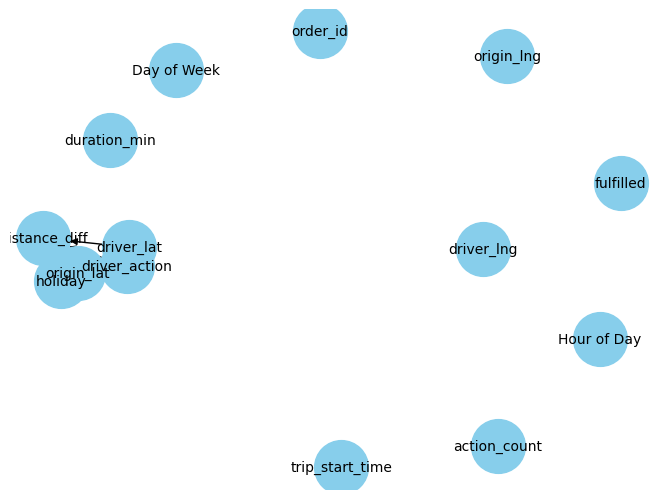

In [60]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(df_data.columns)

# Add edges based on causal relationships (example)
G.add_edge('driver_action', 'distance_diff')
G.add_edge('driver_lat', 'distance_diff')
G.add_edge('origin_lat', 'distance_diff')

# Draw the graph
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)
plt.show()


In [64]:
import sys
sys.path.append("../scripts/")
from data_cleaning import CleanData
cleaner = CleanData()

In [65]:
df = cleaner.find_distance(df_data,distance_col_name="distance_diff",trip_origin_col_names=["driver_lat","driver_lng"],trip_destination_col_names=["origin_lat","origin_lng"])

In [66]:
df.head()

,order_id,driver_lat,driver_lng,origin_lat,origin_lng,distance_diff,trip_start_time,duration_min,holiday,action_count,driver_action,Day of Week,Hour of Day,fulfilled
0,392001,6.602207,3.270465,6.601042,3.276634,0.694264,2021-07-01 09:30:59,3.616667,False,1,accepted,Thursday,9,False
1,392005,6.549147,3.392184,6.565088,3.384441,1.959786,2021-07-01 10:53:36,34.250000,False,1,accepted,Thursday,10,True
2,392009,6.644829,3.289328,6.663648,3.308206,2.947683,2021-07-01 06:39:51,61.350000,False,1,accepted,Thursday,6,True
3,392013,6.435331,3.424317,6.430817,3.434155,1.197389,2021-07-01 08:44:09,35.033333,False,1,accepted,Thursday,8,True
4,392014,6.498221,3.360042,6.499156,3.358517,0.197853,2021-07-01 06:43:07,44.283333,False,1,accepted,Thursday,6,True


In [67]:
# choose non-numeric columns
import numpy as np

struct_data = df.copy()
non_numeric_columns = list(struct_data.select_dtypes(exclude=[np.number]).columns)

print(non_numeric_columns)


['trip_start_time', 'holiday', 'driver_action', 'Day of Week', 'fulfilled']


In [68]:
drop_col = ['order_id','driver_lat','driver_lng','origin_lat','origin_lng','action_count',]
data = df.drop(columns=drop_col)
data.head(5)

,distance_diff,trip_start_time,duration_min,holiday,driver_action,Day of Week,Hour of Day,fulfilled
0,0.694264,2021-07-01 09:30:59,3.616667,False,accepted,Thursday,9,False
1,1.959786,2021-07-01 10:53:36,34.250000,False,accepted,Thursday,10,True
2,2.947683,2021-07-01 06:39:51,61.350000,False,accepted,Thursday,6,True
3,1.197389,2021-07-01 08:44:09,35.033333,False,accepted,Thursday,8,True
4,0.197853,2021-07-01 06:43:07,44.283333,False,accepted,Thursday,6,True


In [69]:
 #  use label encoding non-numeric variables to make data numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in non_numeric_columns:
    struct_data[col] = le.fit_transform(struct_data[col])

struct_data.head(5)


,order_id,driver_lat,driver_lng,origin_lat,origin_lng,distance_diff,trip_start_time,duration_min,holiday,action_count,driver_action,Day of Week,Hour of Day,fulfilled
0,392001,6.602207,3.270465,6.601042,3.276634,0.694264,275,3.616667,0,1,0,4,9,0
1,392005,6.549147,3.392184,6.565088,3.384441,1.959786,626,34.250000,0,1,0,4,10,1
2,392009,6.644829,3.289328,6.663648,3.308206,2.947683,0,61.350000,0,1,0,4,6,1
3,392013,6.435331,3.424317,6.430817,3.434155,1.197389,118,35.033333,0,1,0,4,8,1
4,392014,6.498221,3.360042,6.499156,3.358517,0.197853,1,44.283333,0,1,0,4,6,1


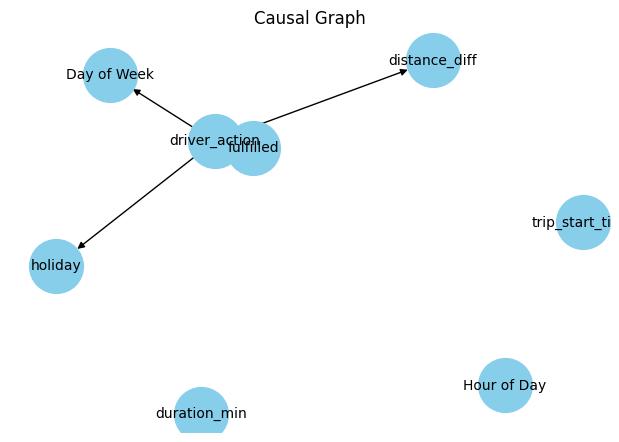

In [119]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(data.columns)

# Add edges based on causal relationships (example)
#G.add_edge('distance_diff','fulfilled')
#G.add_edge('Day of Week','fulfilled')
#G.add_edge('holiday','fulfilled')
G.add_edge('fulfilled','driver_action',)
G.add_edge('driver_action','distance_diff')
G.add_edge('driver_action','Day of Week')
G.add_edge('driver_action','holiday')

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes, seed for reproducibility
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='black', linewidths=1, font_size=10)

# Optionally add a title
plt.title('Causal Graph')

# Display the graph
plt.show()

